In [1]:
import pandas as pd

In [2]:
jan = pd.read_parquet('fhv_tripdata_2021-01.parquet')
feb = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [3]:
# 1
jan

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [4]:
# 2
jan['duration'] = (jan.dropOff_datetime - jan.pickup_datetime) / pd.to_timedelta(1, unit='m')
feb['duration'] = (feb.dropOff_datetime - feb.pickup_datetime) / pd.to_timedelta(1, unit='m')
jan.duration.mean()

19.167224093791006

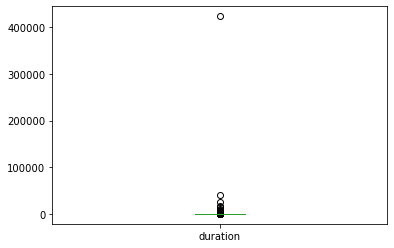

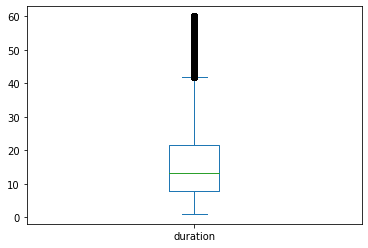

44286 samples dropped for january
47579 samples dropped for february


In [5]:
# Data prep
import matplotlib.pyplot as plt

jan.duration.plot.box()
plt.show()

nsample_jan_before = jan.shape[0]
nsample_feb_before = feb.shape[0]
jan = jan[(jan.duration>=1)&(jan.duration<=60)]
feb = feb[(feb.duration>=1)&(feb.duration<=60)]
jan.duration.plot.box()
plt.show()

print(f'{nsample_jan_before - jan.shape[0]} samples dropped for january')
print(f'{nsample_feb_before - feb.shape[0]} samples dropped for february')

In [6]:
# 3
display(jan[['PUlocationID', 'DOlocationID']].isna().mean())
jan[['PUlocationID', 'DOlocationID']] = jan[['PUlocationID', 'DOlocationID']].fillna(-1)
feb[['PUlocationID', 'DOlocationID']] = feb[['PUlocationID', 'DOlocationID']].fillna(-1)
jan

PUlocationID    0.835273
DOlocationID    0.133270
dtype: float64

/tmp/ipykernel_2088143/2134036827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan[['PUlocationID', 'DOlocationID']] = jan[['PUlocationID', 'DOlocationID']].fillna(-1)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [8]:
# 4
from sklearn.feature_extraction import DictVectorizer
import numpy as np

feature_names = ['PUlocationID', 'DOlocationID']
jan[feature_names] = jan[feature_names].astype(str)
feb[feature_names] = feb[feature_names].astype(str)
#feature_col = 'PU_DO'
#jan[feature_col] = jan.PUlocationID+'_'+jan.DOlocationID
#feb[feature_col] = feb.PUlocationID+'_'+feb.DOlocationID
target = 'duration'
jan_dict = jan[feature_names+[target]].to_dict(orient='records')
feb_dict = feb[feature_names+[target]].to_dict(orient='records')

vectorizer = DictVectorizer(sparse=False)
jan_vec = vectorizer.fit_transform(jan_dict)
feb_vec = vectorizer.transform(feb_dict)

/tmp/ipykernel_2088143/4208075064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan[feature_names] = jan[feature_names].astype(str)


In [13]:
jan_feat, jan_target = jan_vec[:, :-1], jan_vec[:, -1]
feb_feat, feb_target = feb_vec[:, :-1], feb_vec[:, -1]

jan_feat.shape

(1109826, 525)

In [14]:
# 5
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(jan_feat, jan_target)

jan_preds = model.predict(jan_feat)
feb_preds = model.predict(feb_feat)

In [15]:
train_rmse = np.sqrt(np.mean((jan_preds - jan_target)**2))
test_rmse =  np.sqrt(np.mean((feb_preds - feb_target)**2))

In [16]:
train_rmse, test_rmse

(10.528519107168236, 11.014283145112222)